1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [1]:
#1.Загрузить файл hr.csv.
import pandas as pd
df = pd.read_csv('HR.csv')

In [2]:
#2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [4]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


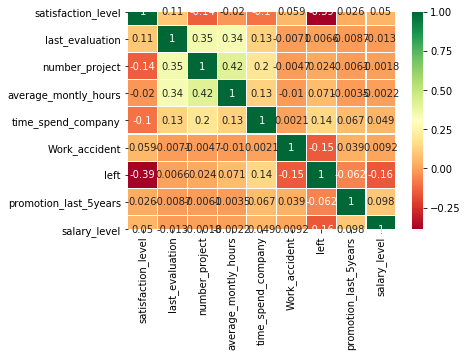

In [6]:
#3.Рассчитать и визуализировать корреляционную матрицу для переменных.
import seaborn as sns
#переведем уровень зарплаты в цифровой эквивалент, чтобы использовать в матрице корреляции
dict_ = {'low':1, 'medium':2, 'high':3}
df['salary_level'] = df['salary'].apply(lambda x: dict_[x] if x in dict_ else 4)
sns.heatmap(df.corr(method = 'pearson'),annot=True,cmap='RdYlGn',linewidths=0.2)
#sns.heatmap(df.corr(method = 'spearman'),annot=True,cmap='RdYlGn',linewidths=0.2)
#sns.heatmap(df.corr(method = 'kendall'),annot=True,cmap='RdYlGn',linewidths=0.2)

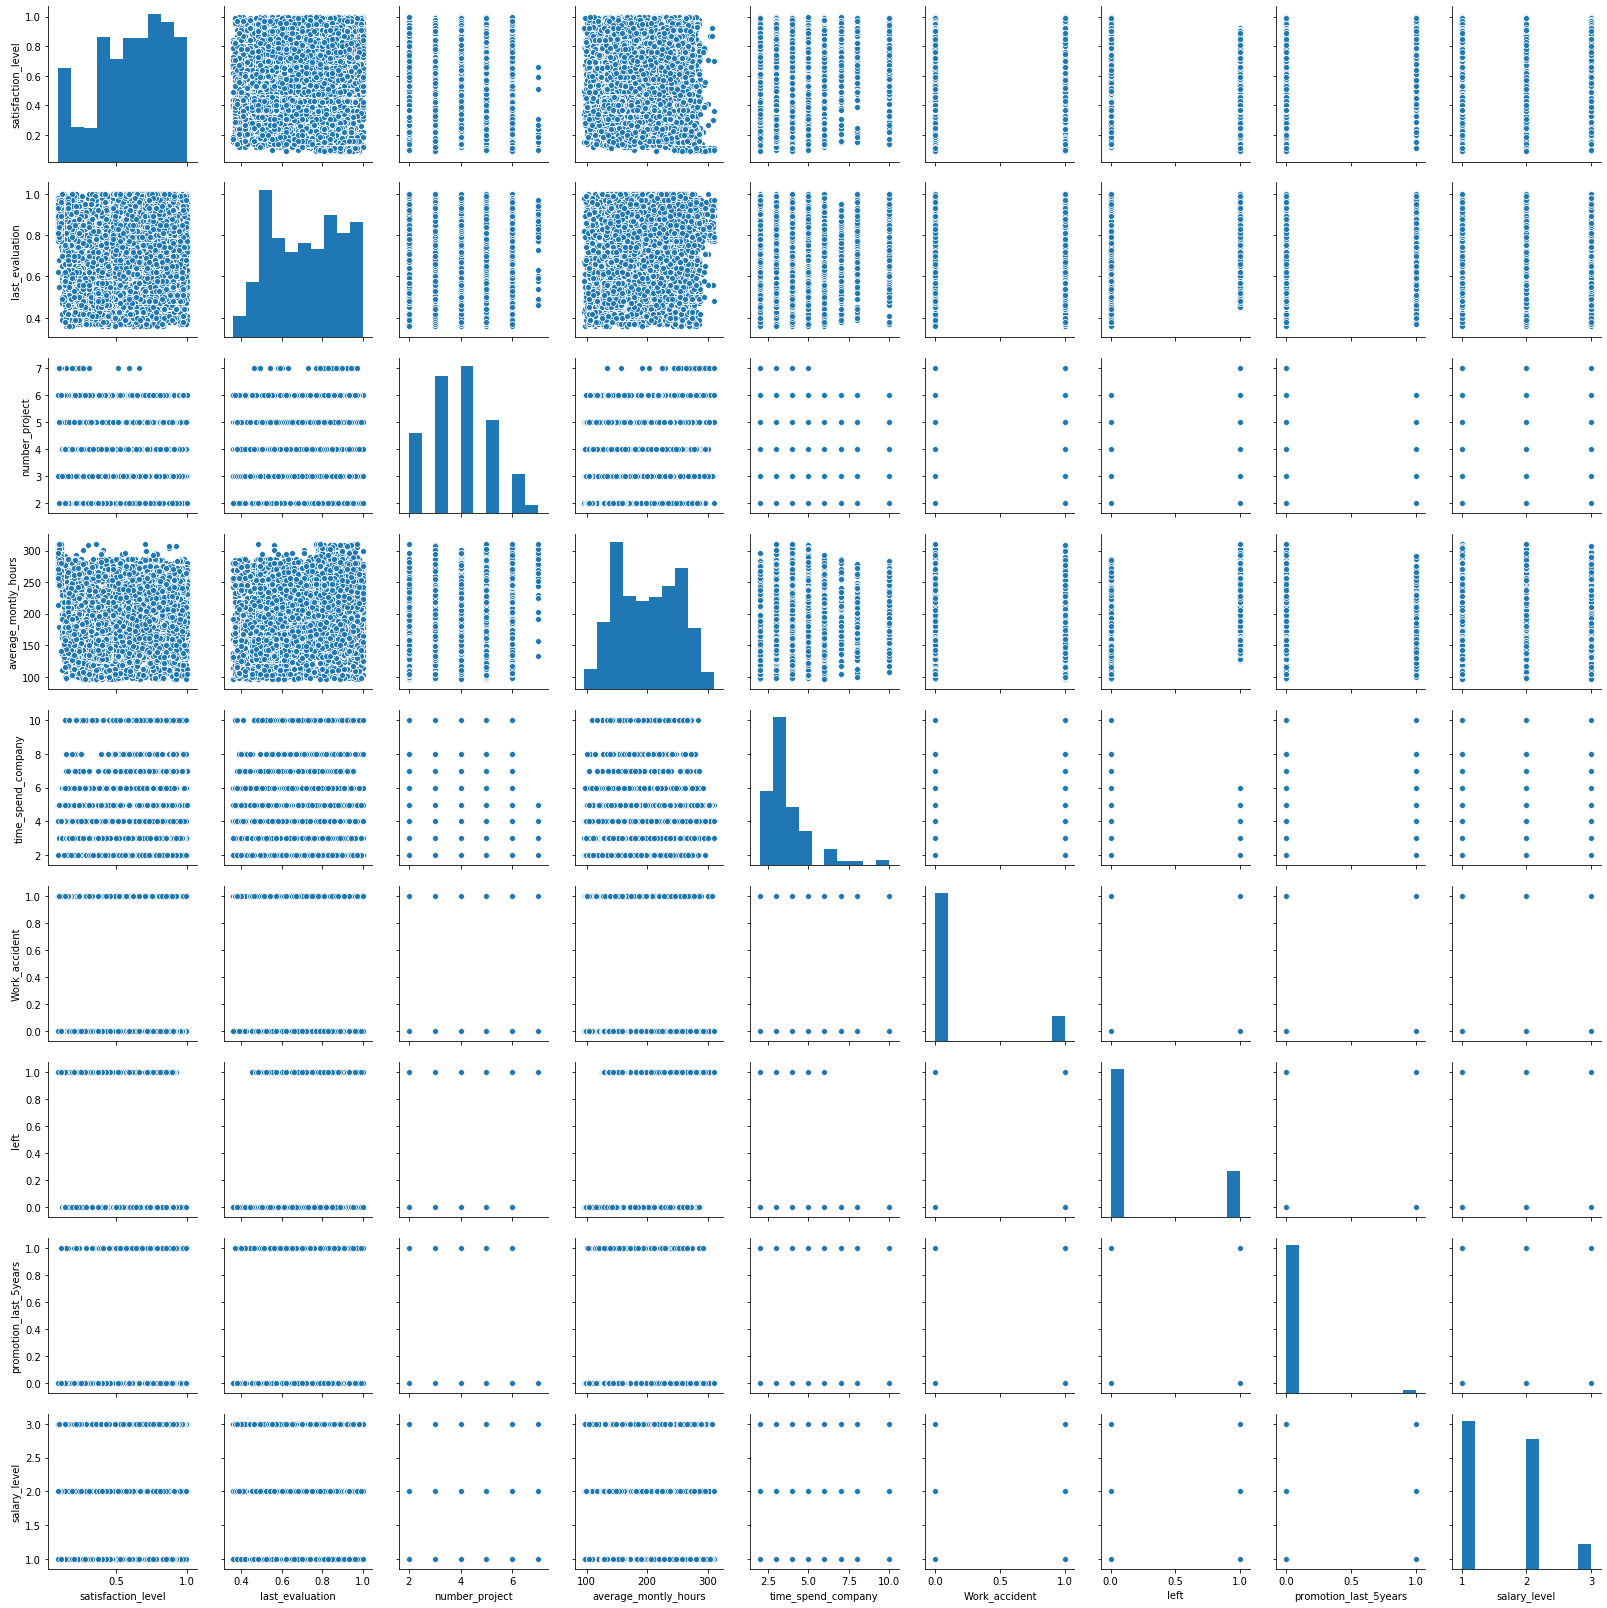

In [7]:
#4.Визуализировать несколько взаимосвязей между переменными.
import matplotlib.pyplot as plt
#plt.scatter(df.salary, df.last_evaluation, marker='.')
#plt.hist(df['Work_accident'])
#satisfaction_level  last_evaluation average_montly_hours  --похожи на нормальное распределение
#plt.scatter(df.satisfaction_level, df.last_evaluation, marker='.')
sns.pairplot(df)
#нет ярко выраженных взаимосвязей

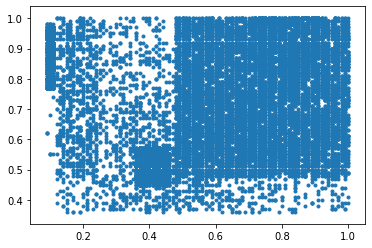

In [8]:
plt.scatter(df.satisfaction_level, df.last_evaluation, marker='.')
#ну не похоже это на зависимость

In [ ]:
#5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
#я много думал, но так и не понял, как ttest_ind и ttest_1samp помогут мне проверить взаимосвязи 
#между несколькими переменными. Эти методы же предназначены для сравнения средних значений двух выборок. 
#Прошу объяснить. Может другие ttest имелись ввиду??

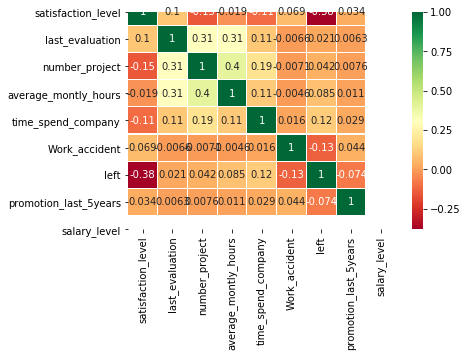

In [9]:
#корреляций между переменными тоже нет, даже если смотреть в разрезе уровня зарплат
#с натяжкой можно назвать корреляцию между уровнем удовлетворенности и фактом увольнения.
#типа - многие из тех, кто был недоволен, уже уволились)
sns.heatmap(df[df['salary'] == 'medium'].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

In [10]:
#6.Рассчитать сколько работников работает в каждом департаменте.
#df.info()
df[df.left == 0].groupby('sales').count()['satisfaction_level']

sales
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: satisfaction_level, dtype: int64

In [11]:
#7.Показать распределение сотрудников по зарплатам.
df[df.left == 0].groupby('salary').count()['satisfaction_level']
#plt.hist(df[df.left == 0]['salary'])

salary
high      1155
low       5144
medium    5129
Name: satisfaction_level, dtype: int64

In [12]:
#8.Показать распределение сотрудников по зарплатам совместно с департаментами.
#df[df.left == 0].groupby(['sales','salary']).count()['satisfaction_level'].unstack()
df[df.left == 0].pivot_table('satisfaction_level', index = 'sales', columns = 'salary', aggfunc='count')

salary,high,low,medium
sales,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


In [13]:
#9.Сколько сотрудников покинули компанию.
df[df.left == 1].count()['satisfaction_level']

3571

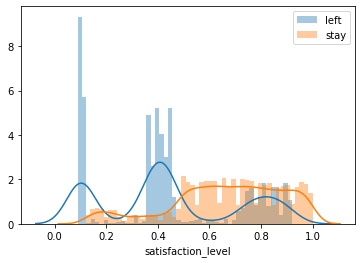

In [14]:
#10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
left = df[df.left == 1] 
stay = df[df.left == 0] 
import seaborn as sns
sns.distplot(left['satisfaction_level'], 50)
sns.distplot(stay['satisfaction_level'], 50)
import matplotlib.pyplot as plt
plt.legend(['left', 'stay'])
plt.show()
#многие уволившиеся сотрудники ставили очень низкую оценку удовлетворенности

In [27]:
mean = []
for i in range(1000):
    left_s = left.sample(frac = 1, replace = True).satisfaction_level.mean()
    total_s = df.sample(frac = 1, replace = True).satisfaction_level.mean()
    mean.append(total_s - left_s)

In [31]:
min(mean), max(mean)
#все значения разниц средних лежат выше нуля, поэтому можно сказать, что уволившиеся сотрудники в среднем ставят 
#оценку satisfaction_level ниже

(0.15597158488806867, 0.18988578926824384)